### 1.Basit Dogrusal Regresyon
#### Model

In [2]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# indexi degisken olarak gorunyordu
#df = df.iloc[:,1:len(df)]

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [7]:
df.isnull().values.any()

False

In [8]:
# dagilimlari ve korelasyonu incelemek
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


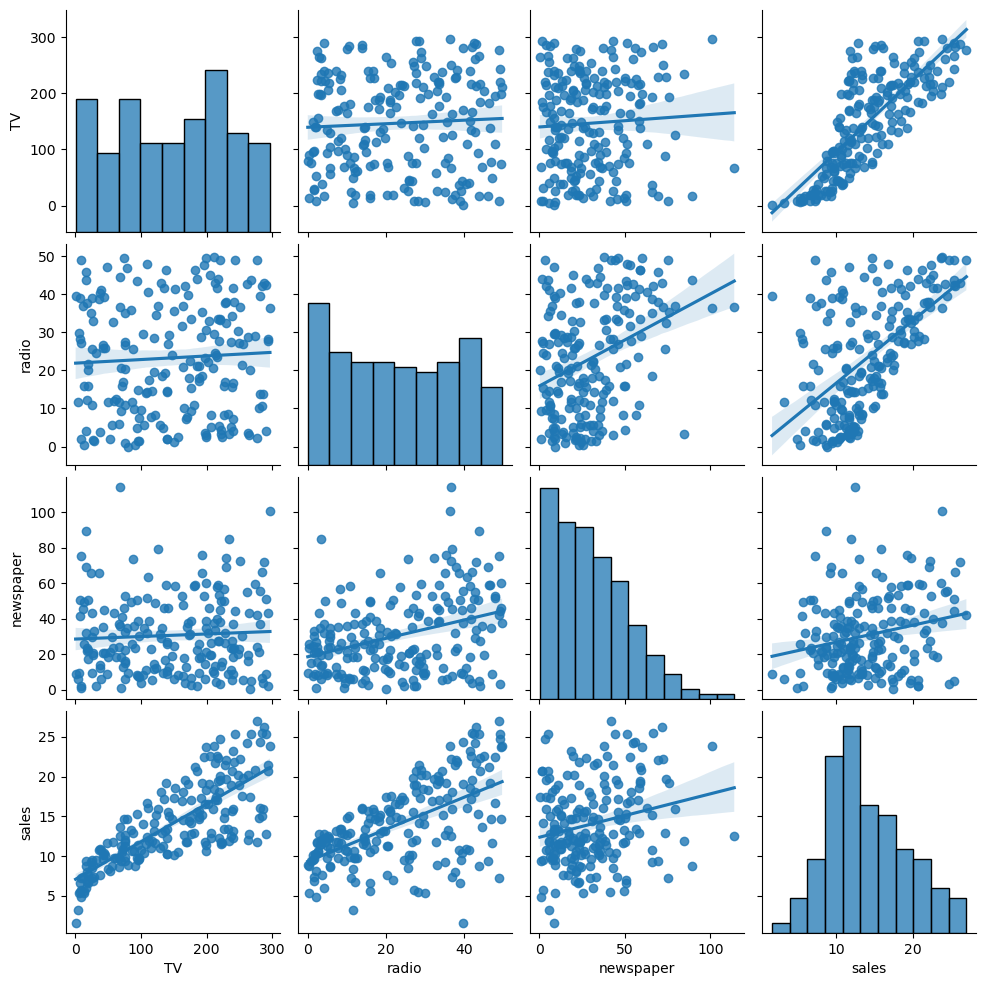

In [9]:
import seaborn as sns
sns.pairplot(df, kind = "reg");

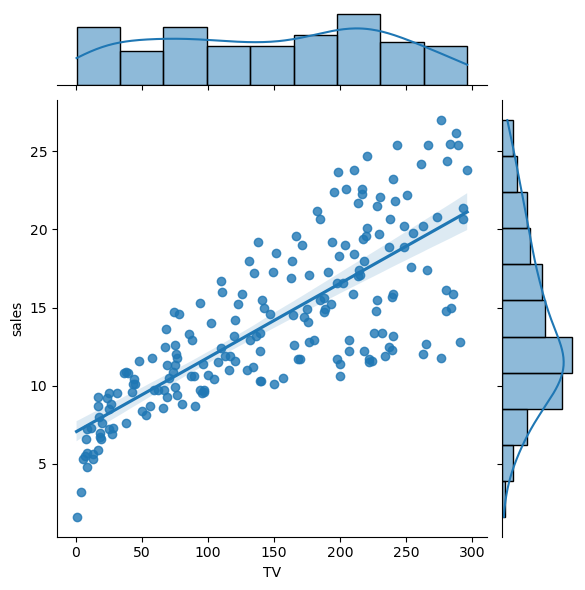

In [10]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

#### Statsmodels ile modelleme

In [12]:
import statsmodels.api as sm
X = df[["TV"]]
X [0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [13]:
X = sm.add_constant(X)
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [14]:
y = df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [15]:
# lm = lineeer models
lm = sm.OLS(y, X)

In [16]:
model = lm.fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           1.47e-42
Time:                        16:39:37   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **Dependent Variable (Bağımlı Değişken):** sales

  Bu, modelinizin açıklamaya çalıştığı değişkendir. Bu durumda sales (satışlar).

- **R-squared (R-kare):** 0.612

  **R-squared**, modelin bağımlı değişkendeki toplam varyansın ne kadarını açıkladığını gösterir. 0.612 değeri, bağımsız değişkenin satışlardaki değişkenliğin %61.2'sini açıkladığını gösterir.

- **Adj. R-squared (Düzeltilmiş R-kare):** 0.610

  **Düzeltilmiş R-kare**, R-squared değerini bağımsız değişken sayısına göre ayarlayarak modelin açıklayıcılığını daha doğru bir şekilde ölçer. Bu, eklenen bağımsız değişkenlerin modelin açıklama gücüne katkıda bulunup bulunmadığını değerlendirir. Bu durumda 0.610, modelin açıklayıcılığının %61.0 olduğunu gösterir.

- **F-statistic (F-istatistiği):** 312.1

  **F-istatistiği**, modeldeki bağımsız değişkenlerin tümünün bağımlı değişken üzerinde anlamlı bir etkisi olup olmadığını test eder. Yüksek bir F-istatistiği, modelin bağımlı değişkeni iyi açıkladığını gösterir. Bu durumda, 312.1 oldukça yüksek bir değerdir.

- **Prob (F-statistic):** 1.47e-42

  Bu, F-istatistiği için p-değeridir ve bağımsız değişkenlerin modelde anlamlı olup olmadığını test eder. Çok düşük bir p-değeri (genellikle 0.05'ten küçük), bağımsız değişkenlerin modelde anlamlı olduğunu gösterir. Bu durumda, 1.47e-42 değeri sıfıra çok yakındır, bu da bağımsız değişkenin modelde son derece anlamlı olduğunu gösterir.

- **Model:** OLS (Ordinary Least Squares)

  Bu, kullanılan regresyon modelinin türüdür. OLS, en küçük kareler yöntemiyle parametreleri tahmin eder.

- **Method (Yöntem):** Least Squares

  Bu, en küçük kareler yöntemini kullanarak modelin parametrelerini tahmin etme yöntemidir.

- **Date (Tarih):** Tue, 06 Aug 2024

  Bu, analizin yapıldığı tarih ve saati gösterir.

- **Time (Saat):** 11:49:02

  Bu, analizin yapıldığı saati gösterir.

- **Log-Likelihood (Log-Olasılık):** -519.05

  Bu, modelin log-olasılık değeridir. Modelin uygunluğunu değerlendirmek için kullanılır ve genellikle daha yüksek (daha az negatif) değerler daha iyi model uyumunu gösterir.

- **No. Observations (Gözlem Sayısı):** 200

  Bu, analizde kullanılan toplam gözlem (veri noktası) sayısını gösterir.

- **AIC (Akaike Information Criterion):** 1042

  **AIC**, modelin uyum kalitesini ve karmaşıklığını değerlendirir. Daha düşük AIC değerleri daha iyi model uyumunu gösterir.

- **Df Residuals (Artık Serbestlik Derecesi):** 198

  Bu, modelde kalan serbestlik derecelerinin sayısını gösterir (toplam gözlem sayısı - modeldeki parametre sayısı).

- **BIC (Bayesian Information Criterion):** 1049

  **BIC**, modelin uyum kalitesini ve karmaşıklığını değerlendirir. Daha düşük BIC değerleri daha iyi model uyumunu gösterir.

- **Df Model (Model Serbestlik Derecesi):** 1

  Bu, modelde kullanılan bağımsız değişken sayısını gösterir. Bu durumda, modelde sadece bir bağımsız değişken vardır.

- **Covariance Type (Kovaryans Türü):** nonrobust

  Bu, kullanılan kovaryans matrisinin türünü belirtir. Nonrobust, standart varsayımlara dayandığını gösterir.


In [19]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           1.47e-42
Time:                        16:39:37   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# paremetreler
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [21]:
# kat sayilari
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [22]:
# guven araliklarina erismek icin
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [23]:
# modelin anlamligina iliskin istatistiklere erismek istersek 
model.f_pvalue


1.467389700194647e-42

In [24]:
print("f_pvalue: ", "%.3f" % model.f_pvalue)

f_pvalue:  0.000


In [25]:
# f istatistigine erismek
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  312.14


In [26]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

tvalue:  15.36


C:\Users\Abdurezzak Ekidi\AppData\Local\Temp\ipykernel_6852\665631458.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("tvalue: ", "%.2f" % model.tvalues[0:1])


In [27]:
# hata karelerin ortalamasi
model.mse_model

3314.618166868649

In [28]:
# r kare degeri
model.rsquared

0.611875050850071

In [29]:
# duzeltilmis r kare
model.rsquared_adj

0.6099148238341623

In [30]:
# tahmin edilen degerler
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [31]:
# gercek degerler
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [32]:
# formul(eski kullanim)
print("Sales = " +str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" %model.params[1]))

Sales = 7.03 + TV*0.05


C:\Users\Abdurezzak Ekidi\AppData\Local\Temp\ipykernel_6852\4037851780.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Sales = " +str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" %model.params[1]))


In [33]:
intercept = model.params.iloc[0]
tv_coefficient = model.params.iloc[1]

# Regresyon formülünü yazdırma
print(f"Sales = {intercept:.2f} + TV * {tv_coefficient:.2f}")

Sales = 7.03 + TV * 0.05


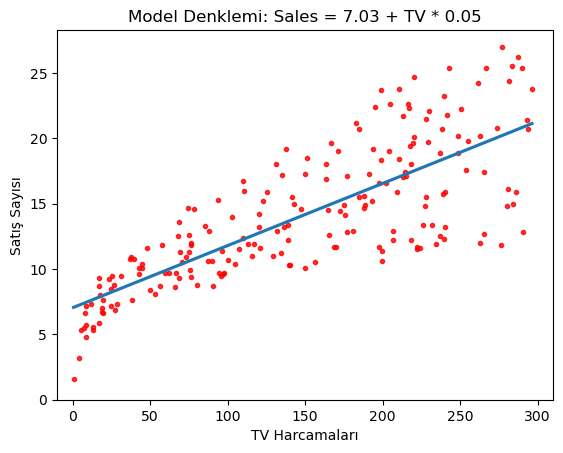

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(x=df["TV"], y=df["sales"], ci=None, scatter_kws={'color': 'r', 's': 9})
g.set_title("Model Denklemi: Sales = 7.03 + TV * 0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom = 0);

In [35]:
# yukarida yaptigimiz islemleri burda sklearn lib ile yapalim
from sklearn.linear_model import LinearRegression

In [36]:
# reg = LinearRegression()  orneklem olusturmus oluyoruz daha sonra 
#kurma islemlerini gerceklestiriyoruz
X = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_

array([7.03259355])

In [37]:
model.coef_

array([[0.04753664]])

In [38]:
#  bu score r kare degeri
model.score(X, y)

0.611875050850071

In [39]:
# predict  tahmin edilen degerlere erisyoruz..
model.predict(X)[0:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

#### Tahmin
Model Denklemi :

Sales = 7.03 + TV * 0.04

ornegin 30 birim TV harcamasi oldugunda sarislarin tahmini degeri ne olur?

In [41]:
7.03 + 30 * 0.04

8.23

In [42]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [43]:
model.predict([[30]])

C:\Users\Abdurezzak Ekidi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [44]:
yeni_veri = [[30], [90], [200]]

In [45]:
model.predict(yeni_veri)

C:\Users\Abdurezzak Ekidi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 8.45869276, 11.31089119, 16.53992164])

### Artiklar Ve Makine Ogrenmesindeki Onemi

In [47]:
# hata kareler ortlamasini  ve r2 
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [49]:
mse = mean_squared_error(y, model.fittedvalues)

In [50]:
mse

10.512652915656757

In [51]:
import numpy as np
rmse = np.sqrt(mse)

In [52]:
rmse

3.2423221486546887

In [53]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [54]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [55]:

k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

In [56]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [57]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [58]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [59]:
k_t["hata_kare"] = k_t["hata"] **2

In [60]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [61]:
np.sum(k_t["hata_kare"])

92.90350329638103

In [62]:
np.mean(k_t["hata_kare"])

9.290350329638104

In [63]:
# hata kareler ortalamasini karekoku
np.sqrt(np.mean(k_t["hata_kare"]))

3.0480075999967755

In [64]:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

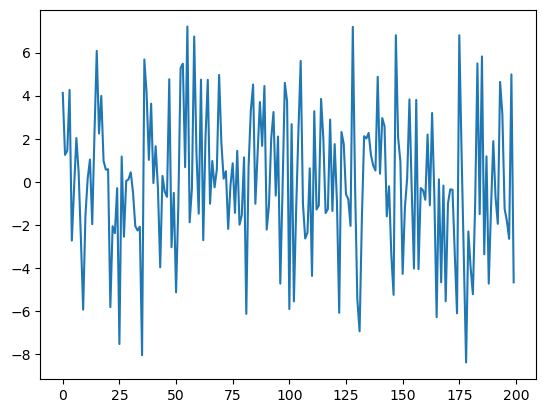

In [65]:
# artiklarin gorsellestirilmesi
plt.plot(model.resid);

### 2.Coklu Dogrusal Regresyon
temel amac, bagimli ve bagimsiz degiskenler arasindaki iliskiyi ifade eden dogrusal fonksiyonu bulmaktir.

In [67]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1, 2, 3, 4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [68]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [69]:
X = df.drop("sales", axis = 1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [70]:
X_train.shape

(160, 3)

In [71]:
y_train.shape

(160,)

In [72]:
X_test.shape

(40, 3)

In [73]:
y_test.shape

(40,)

In [74]:
training = df.copy()

In [75]:
training.shape

(200, 4)

#### Statsmodels

In [77]:
lm = sm.OLS(y_train, X_train)

In [78]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Fri, 09 Aug 2024   Prob (F-statistic):                   1.28e-137
Time:                        16:39:38   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


#### scikit-learn model

In [81]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [82]:
# sabit katsayi
model.intercept_

2.979067338122629

In [83]:
# tum bagimsiz degiskenleri katsayilari
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

#### Tahmin
Model denklemi:

Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

ornegin 30 birim TV harcamasi, 10 birim radio harcamasi, 40 birimde gazete harcamasi oldugunda satislarin tahmini degeri ne olur?

In [85]:
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [86]:
model.predict(yeni_veri)

C:\Users\Abdurezzak Ekidi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.32334798])

In [87]:
# egitim hatasi
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [88]:
rmse

1.644727765644337

In [89]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [90]:
rmse

1.7815996615334502

#### Model Tuning / Model Dogrulama

In [92]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [93]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [94]:
X = df.drop("sales", axis = 1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                   random_state = 144)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [95]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.6748559274650712

In [96]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.6640263686701033

In [97]:
# r^2 degerine bakacagiz
model.score(X_train, y_train)

0.8971614078663419

In [98]:
# cv =10  kac katli cross validation
cross_val_score(model, X, y, cv = 10, scoring = "r2").mean()

0.8853562237979616

In [99]:
# bu yontem daha dogru 
cross_val_score(model,
                X_train, y_train,
                cv = 10,
                scoring = 'r2').mean()

0.8733783298422942

In [100]:
# suanda  egitim setimiz icin 10 adet egitim hatasi olusturuldu ve bu egitim 
#hatalarinin her birisi bir birinden farkli np.sqrt onu erkliyerek rmse degerleri olusturduk
np.sqrt(-cross_val_score(model,
                X_train,
                y_train,
                cv = 10,
                scoring = 'neg_mean_squared_error')).mean()

1.6649345607872932

In [101]:
np.sqrt(-cross_val_score(model,
                        X_test,
                        y_test,
                        cv = 10,
                        scoring = "neg_mean_squared_error")).mean()

1.7399924960346644

### 3.Principal component regression(Temel Bilesen Regresyonu)
- degiskenlere boyut indirgeme uygulandiktan sonra cikan bilesenlere  regresyon modeli kurulmasi fikrine dayanir. 

#### PCR Model

##### Veri Seti Hikayesi
- Konu: Beyzbol oyuncularının performans istatistikleri.
- Özellikler: Oyuncuların vuruşları, koşuları, ev sahibi koşuları, RBI'ları (Run Batted In), çalıntı bazlar ve daha birçok istatistiksel veri.
- Amaç: Oyuncuların performanslarını değerlendirmek, analiz etmek ve tahmin modelleri oluşturmak.

In [105]:
import pandas as pd
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [107]:
df.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

In [108]:
df = df.astype({'League' : 'category', 'Division' : 'category', 'NewLeague' : 'category'})

In [109]:
hit.isnull().values.any()

True

In [110]:
hit.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [112]:
# One-Hot Donusumu ve Dummy Degisken
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms = dms.astype(int)
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [113]:
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")

In [114]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [115]:
# X Bagimsiz degiskenler
# y bagimli degisken
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.25,
                                                   random_state = 42)


print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

traning = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (200, 4)



- PCA (Principal Component Analysis - Temel Bileşen Analizi) import ediyoruz
  

In [119]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [120]:
# scale bir olcuklendirme
X_reduced_train = pca.fit_transform(scale(X_train))

In [121]:
X_reduced_train[0:1, :]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [122]:
# acilanan varyansi inceliyelim.
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([38.18, 59.88, 70.88, 78.88, 84.18])

In [123]:
lm = LinearRegression()

In [124]:
# burda ise tum degiskenleri kullanarak modeli fit islemi gerceklestirdik.
pcr_model = lm.fit(X_reduced_train, y_train)                  

In [125]:
# sabit
pcr_model.intercept_

543.4834416243655

In [126]:
# katsayilar
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

#### PCR Tahmin

In [128]:
y_pred = pcr_model.predict(X_reduced_train)

In [129]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [130]:
np.sqrt(mean_squared_error(y_train,y_pred))

289.3292825564976

In [131]:
df["Salary"].mean()

535.9258821292775

In [132]:
r2_score(y_train, y_pred)

0.5770075250410179

In [133]:
# Veriyi ölçeklendirme
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [134]:
pca2 = PCA()

In [135]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [136]:
# egitim seti uzerinden kurmus oldugum modeli kullanarak test setinin x degerlerini modele
# yerlestirip y'ni tahmin(y_pred) edilen elde etmis olduk.
y_pred = pcr_model.predict(X_reduced_test)

In [137]:
np.sqrt(mean_squared_error(y_test, y_pred))

405.15753641499634

#### Model Tuning (PCR)

In [139]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.7914255682224


In [140]:
from sklearn import model_selection

In [141]:
# cv = cross vaalidation..   shuffle = gruplar'a ayrilmadan once verilerin karilistirip
# karilistirilmayacagini bilgisi Tasiyor
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [142]:
lm = LinearRegression()

In [143]:
RMSE = []

In [144]:
"""
her bir bilesen sayisi icin gidip model kuracak her bir bilesen sayisi icin
k_katli cross validation uygulayip burdaki hata degerlerini elde edip daha sonra bize
hangi bilesen sayisinin daha az hata olusturdugu bilgisi sunmus olacak.
"""
for i in np.arange(1, X_reduced_train.shape[1] + 1 ):
    score = np.sqrt(-1 * model_selection.cross_val_score(lm,
                                                        X_reduced_train[:,:i],
                                                        y_train.ravel(),
                                                        cv = cv_10,
                                                        scoring = 'neg_mean_squared_error').mean())
    RMSE.append(score)    

C:\Users\Abdurezzak Ekidi\AppData\Local\Temp\ipykernel_6852\1750173422.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
C:\Users\Abdurezzak Ekidi\AppData\Local\Temp\ipykernel_6852\1750173422.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
C:\Users\Abdurezzak Ekidi\AppData\Local\Temp\ipykernel_6852\1750173422.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
C:\Users\Abdurezzak Ekidi\AppData\Local\Temp\ipykernel_6852\1750173422.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion t

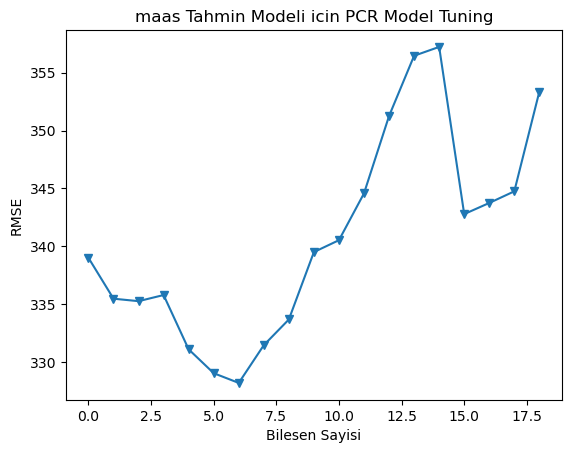

In [145]:
plt.plot(RMSE, '-v')
plt.xlabel("Bilesen Sayisi")
plt.ylabel("RMSE")
plt.title('maas Tahmin Modeli icin PCR Model Tuning');

In [146]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [147]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6]) 

In [148]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.82659830945005


In [149]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [150]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

393.1198700096223


### 4.PLS - Kismi En Kucuk Kareler Regresyonu
- Degiskenlerin daha az sayida  ve aralarinda  coklu dogrusal baglanti problemi olmayan bilesenlere indirgenip  regresyon modlei kurulmasi fikrine dayanir.
- ![https://miro.medium.com/v2/resize:fit:828/format:webp/1*IG2LybnHH-bFGNKX23s1SQ.png "MarineGEO logo")

#### PLS Model

In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [154]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype('float64')
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.25,
                                                    random_state = 42)
                        

In [155]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [156]:
# n_components = bilesen sayisini degistiriyoruz.
pls_model = PLSRegression().fit(X_train, y_train)

In [157]:
pls_model.coef_

array([[ 35.32916493,  48.83425857,  18.50240933,  39.28117603,
         30.59952998,  40.03398345,  16.85990516,  28.22289896,
         32.73784993,  22.00875744,  33.60903032,  30.39402522,
         25.73279799,  54.98835148,   6.56590871,  -0.90894359,
         17.60903423, -37.24246339,  14.69680385]])

#### PLS Tahmin

In [159]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [160]:
pls_model.predict(X_train)[0:10]

array([344.91941493, 848.87070769, 692.93622642, 185.56577984,
       435.49196077, 987.49530026, 120.63097106, 289.9263406 ,
       663.41886918, 817.90486641])

In [161]:
y_pred = pls_model.predict(X_train)

In [162]:
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696

In [163]:
r2_score(y_train, y_pred)

0.5140424486535482

In [164]:
y_pred = pls_model.predict(X_test)

In [165]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

#### PLS Model Tuning

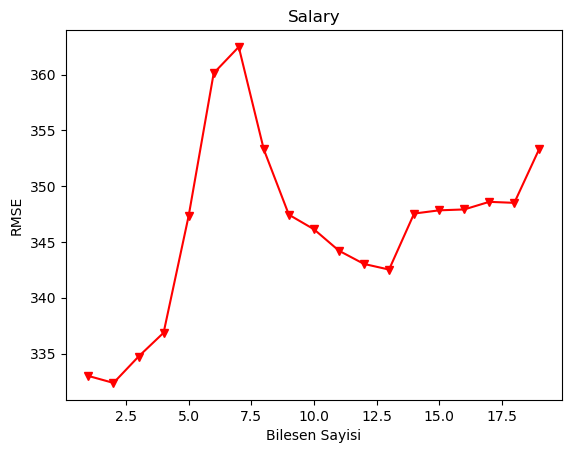

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

# cv (cross validation)
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

# Hata hesaplamak icin dongu
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1 *cross_val_score(pls,
                                        X_train,
                                        y_train,
                                        cv=cv_10,
                                        scoring='neg_mean_squared_error').mean())
                                                          
# RMSE.append(score) döngü içine yerleştirildi                                                
                                                         
    RMSE.append(score)  

# sonuclarin Gorsellestirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c="red")
plt.xlabel('Bilesen Sayisi')
plt.ylabel('RMSE')
plt.title('Salary')
plt.show()

In [168]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [169]:
y_pred = pls_model.predict(X_test)

In [170]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

### 5.Ridge Regresyon
- Amac hata kareler toplamini minimize eden katsayilari bu katsayilara bir ceza uygulayarak bulmaktir.

#### Model

In [173]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [174]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [175]:
from sklearn.linear_model import Ridge

In [176]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [177]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

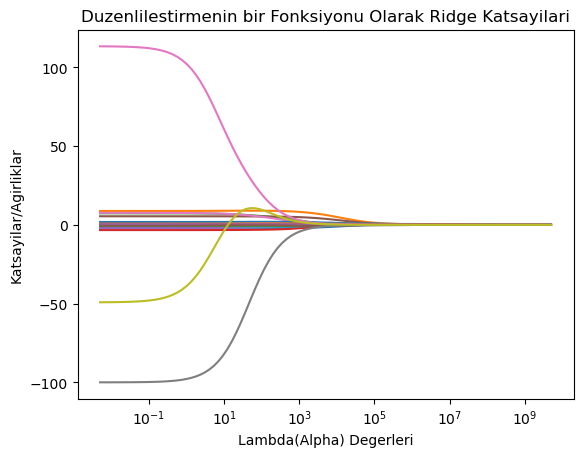

In [178]:
lambdalar = 10**np.linspace(10, -2, 100)*0.5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)



ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale('log')


plt.xlabel('Lambda(Alpha) Degerleri')
plt.ylabel('Katsayilar/Agirliklar')
plt.title('Duzenlilestirmenin bir Fonksiyonu Olarak Ridge Katsayilari');

#### Tahmin(Ridge)

In [180]:
y_pred = ridge_model.predict(X_test)

In [181]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.0517922282842

In [182]:
r2_score(y_test,y_pred)

0.41108449050676144

#### Model Tuning

In [184]:
lambdalar = 10**np.linspace(10, -2, 100)*0.5

In [185]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [186]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

# Verileri normalize etmek
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = 'neg_mean_squared_error')

In [187]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [188]:
ridge_cv.alpha_

2018508.6292982749

In [189]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_tuned = Ridge(alpha = ridge_cv.alpha_).fit(X_train, y_train)

In [190]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

387.667243773898

### 6. Lasso Regresyon
- Amac hata kareler toplamini minimize eden katsayilari bu katsayilara bir ceza uygulayarak bulmaaktir.
#### Model

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']], drop_first=True)
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)


In [39]:
from sklearn.linear_model import Lasso

In [17]:
lasso_model = Lasso(alpha  = 0.1).fit(X_train, y_train)

C:\Users\Abdurezzak Ekidi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.249e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [25]:
lasso_model

Lasso(alpha=0.1)

In [29]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

Text(0, 0.5, 'weights')

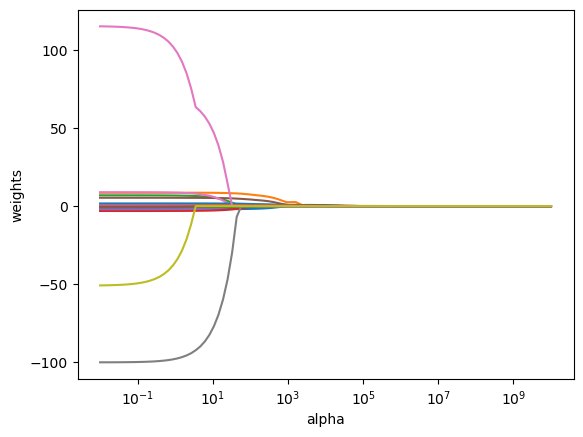

In [151]:
# hatalari kapatmak icin 
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
lasso = Lasso()
lambdalar = 10**np.linspace(10, -2, 100) * 0.5
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)


ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

#### Tahmin

In [52]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [54]:
y_pred = lasso_model.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error

In [60]:
# Test Hatasi
np.sqrt(mean_squared_error(y_test, y_pred))

356.754527014877

#### Model Tuning

In [71]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [81]:

# Veriyi normalize edin
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LassoCV modelini oluşturun
lasso_cv_model = LassoCV(alphas=None, cv=10, max_iter=10000)

# Modeli eğitin
lasso_cv_model.fit(X_train_scaled, y_train)


LassoCV(cv=10, max_iter=10000)

In [83]:
lasso_cv_model.alpha_

5.158148359105576

In [85]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [87]:
lasso_tuned.fit(X_train, y_train)

C:\Users\Abdurezzak Ekidi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.200e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=5.158148359105576)

In [89]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

354.8974931263451

### ElasticNet Regrestonu
- Amac hata kareler toplamini minimize eden katsayilari bu katsayilara bir ceza uygulayarak bulmaktir. ElasticNet L1 ve L2 yaklasimini birlestirir.
#### Model

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split

hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']], drop_first=True)
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)


In [96]:
from sklearn.linear_model import ElasticNet

In [100]:
enet_model = ElasticNet().fit(X_train, y_train)

C:\Users\Abdurezzak Ekidi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [102]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [104]:
enet_model.intercept_

-6.465955602111762

#### Tahmin

In [112]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [116]:
y_pred = enet_model.predict(X_test)

In [118]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.16765481812445

In [122]:
from sklearn.metrics import r2_score

In [124]:
r2_score(y_test, y_pred)

0.4107022246932692

#### Model Tuning

In [127]:
from sklearn.linear_model import ElasticNetCV

In [129]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [131]:
enet_cv_model.alpha_

5230.764736479864

In [140]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train, y_train)

In [142]:
y_pred = enet_tuned.predict(X_test)

In [144]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795